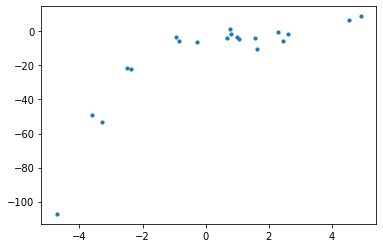

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)
plt.scatter(x,y, s=10)
plt.show()

In [ ]:
x

array([-3.29215704,  0.79952837, -0.93621395, -4.7226796 , -3.60267397,
        4.93183364, -0.85026525,  2.45407162,  2.30965656,  0.76820449,
        1.56786929, -2.36282052, -0.28311318,  1.63497495,  0.6684103 ,
        0.99897702, -2.48223722,  2.61547479,  1.0607969 ,  4.56228722])

In [ ]:
# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]


In [ ]:
x.ndim

2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

np.random.seed(0)

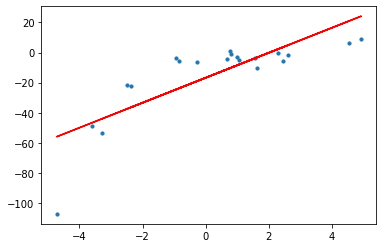

In [ ]:
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

plt.scatter(x, y, s=10)
plt.plot(x, y_pred, color='r')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(y,y_pred))
r2 = r2_score(y,y_pred)
print(rmse)
print(r2)

15.908242501429998
0.6386750054827146


In [ ]:
from sklearn.preprocessing import PolynomialFeatures


In [ ]:
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)


In [ ]:
x_poly

array([[ 1.        , -3.29215704, 10.83829796],
       [ 1.        ,  0.79952837,  0.63924562],
       [ 1.        , -0.93621395,  0.87649656],
       [ 1.        , -4.7226796 , 22.30370258],
       [ 1.        , -3.60267397, 12.97925974],
       [ 1.        ,  4.93183364, 24.32298305],
       [ 1.        , -0.85026525,  0.722951  ],
       [ 1.        ,  2.45407162,  6.02246754],
       [ 1.        ,  2.30965656,  5.3345134 ],
       [ 1.        ,  0.76820449,  0.59013814],
       [ 1.        ,  1.56786929,  2.4582141 ],
       [ 1.        , -2.36282052,  5.58292081],
       [ 1.        , -0.28311318,  0.08015307],
       [ 1.        ,  1.63497495,  2.67314309],
       [ 1.        ,  0.6684103 ,  0.44677233],
       [ 1.        ,  0.99897702,  0.99795508],
       [ 1.        , -2.48223722,  6.16150161],
       [ 1.        ,  2.61547479,  6.84070838],
       [ 1.        ,  1.0607969 ,  1.12529005],
       [ 1.        ,  4.56228722, 20.81446466]])

In [ ]:
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)


In [ ]:
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)


10.120437473614711
0.8537647164420812


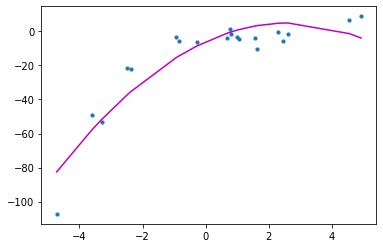

In [ ]:
import operator

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

23.188985407100322
0.23225482806073816


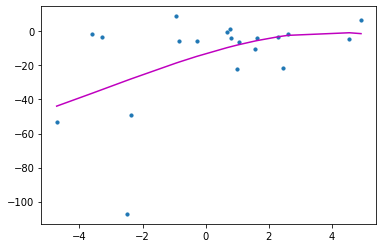

In [ ]:
import operator
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)
plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

In [19]:
# splitting the data
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, 
                                                    train_size=0.5,
                                                    test_size=0.5,
                                                    random_state=48)

In [20]:
train_x

[array([1.56786929]),
 array([2.30965656]),
 array([-3.29215704]),
 array([1.63497495]),
 array([-0.85026525]),
 array([4.93183364]),
 array([2.45407162]),
 array([-2.36282052]),
 array([2.61547479]),
 array([-4.7226796])]

In [21]:
from sklearn.preprocessing import PolynomialFeatures

def create_polynomial_regression_model(degree):
  "Creates a polynomial regression model for the given degree"
  
  poly_features = PolynomialFeatures(degree=degree)
  
  # transforms the existing features to higher degree features.
  X_train_poly = poly_features.fit_transform(train_x)
  
  # fit the transformed features to Linear Regression
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, train_y)
  
  # predicting on training data-set
  y_train_predicted = poly_model.predict(X_train_poly)
  
  # predicting on test data-set
  y_test_predict = poly_model.predict(poly_features.fit_transform(test_x))
  
  # evaluating the model on training dataset
  rmse_train = np.sqrt(mean_squared_error(train_y, y_train_predicted))
  r2_train = r2_score(train_y, y_train_predicted)
  
  # evaluating the model on test dataset
  rmse_test = np.sqrt(mean_squared_error(test_y, y_test_predict))
  r2_test = r2_score(test_y, y_test_predict)
  
  print("The model performance for the training set")
  print("-------------------------------------------")
  print("RMSE of training set is {}".format(rmse_train))
  print("R2 score of training set is {}".format(r2_train))
  
  print("\n")
  
  print("The model performance for the test set")
  print("-------------------------------------------")
  print("RMSE of test set is {}".format(rmse_test))
  print("R2 score of test set is {}".format(r2_test))

In [22]:
create_polynomial_regression_model(2)


The model performance for the training set
-------------------------------------------
RMSE of training set is 14.067914844158866
R2 score of training set is 0.48442696633198423


The model performance for the test set
-------------------------------------------
RMSE of test set is 29.712703016321385
R2 score of test set is 0.13178185408631016
